In [158]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
directory = 'data/sat_images/all_together/'

In [160]:
X_train = image_dataset_from_directory(
    directory, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=42,
    validation_split=0.3, subset='training', interpolation='bilinear', follow_links=True
)
# this batch size is how it divides the data in the epochs below

Found 15820 files belonging to 6 classes.
Using 11074 files for training.


In [161]:
X_test = image_dataset_from_directory(
    directory, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=42,
    validation_split=0.3, subset='validation', interpolation='bilinear', follow_links=True
)

Found 15820 files belonging to 6 classes.
Using 4746 files for validation.


In [33]:
X_train.class_names

['Eco-Friendly',
 'Informal Campsite',
 'Short-term Parking',
 'Showers',
 'Water',
 'Wild Camping']

In [34]:
X_test.class_names

['Eco-Friendly',
 'Informal Campsite',
 'Short-term Parking',
 'Showers',
 'Water',
 'Wild Camping']

In [35]:
image_batch, labels_batch = next(iter(X_train))

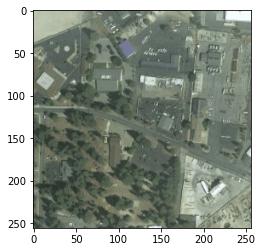

In [36]:
plt.imshow(image_batch[0].numpy().astype("uint8"))

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import data

In [ ]:
# # I don't think I need these, but just for reference:
# from skimage.transform import resize
# # if need to rescale
# img_shp_desired = (100, 100, 3)
# img_resized = resize(img_cropped_2, img_shp_desired, mode='constant')
# plt.imshow(img_resized)
# # if need to grayscale
# plt.imshow(img_hsv[:,:,0], cmap='gray');

In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [ ]:
# check balance of classes do anything about it?

In [ ]:
# # create train and test set
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1. / 255)

# train_generator = train_datagen.flow_from_directory(
#     data_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size)

In [117]:
# set parameters
num_classes = 6
epochs = 2 # number of passes through the entire train dataset before weights "final"
AUTOTUNE = data.experimental.AUTOTUNE
# X_train = X_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# X_test = X_test.cache().prefetch(buffer_size=AUTOTUNE)
img_height = 256
img_width = 256
#input_shape = (img_rows, img_cols, 1)   # 1 channel image input (grayscale) KEEP
nb_filters = 16    # number of convolutional filters to use (same as neurons)
pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
#batch_size = 1000 # number of training samples used at a time to update the weights
# model.add(Dropout(0.5))  # zeros out some fraction of inputs (neurons), helps prevent overfitting

# add callback to save weights 
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
# model callback
# reduce LR on plateau

# what about padding? below same uses padding if needed

# '''
# When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a 
# number of output units from the layer during the training process. Dropout takes a fractional 
# number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 
# 20% or 40% of the output units randomly from the applied layer.
# '''

In [118]:
model = Sequential([
    # is this where I can add other augmentation?
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    layers.Conv2D(nb_filters, 3, padding='same', activation='relu'), # was 16, 32, 64
    layers.MaxPooling2D(pool_size=pool_size),
    layers.Conv2D(nb_filters, 3, padding='same', activation='relu'), # drop layers.. for initial testing
    layers.MaxPooling2D(pool_size=pool_size),
#     layers.Conv2D(nb_filters, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=pool_size),
    # insert more layers?
    # insert callback?
    layers.Flatten(),
    layers.Dense(128, activation='relu'), # softmax? # make this number much higher
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [119]:
model.compile(optimizer='adam',
#               loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])
              # if multiclass then use this:
              loss = keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [120]:
# check model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

In [121]:
# run it
# try more epochs (maybe 1000.. at least 100)
history = model.fit(
            X_train,
            validation_data = X_test,
            epochs = epochs,
            #batch_size=batch_size,
            verbose = 1
) # weighted_metrics

Epoch 1/2
347/347 [==============================] - 268s 773ms/step - loss: 1.3799 - accuracy: 0.6632 - val_loss: 1.3615 - val_accuracy: 0.6820
Epoch 2/2
347/347 [==============================] - 270s 778ms/step - loss: 1.3791 - accuracy: 0.6645 - val_loss: 1.3615 - val_accuracy: 0.6820


In [81]:
score = model.evaluate(X_test, verbose=1) # diff that model.predict ? yes.. just gets scores will predict will return classes
print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

48/48 [==============================] - 50s 1s/step - loss: 1.3048 - accuracy: 0.6820
Test score: 1.3047984838485718
Test accuracy: 0.6820480227470398


In [84]:
predictions = model.predict(X_test, verbose=1)

48/48 [==============================] - 46s 967ms/step


In [85]:
predictions.shape

(4746, 6)

In [88]:
predictions.min()

-0.545223

In [89]:
predictions.max()

0.61054087

In [87]:
predictions[1000:1100,:]

array([[-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.43949312, -0.545223  ,
         0.61054087],
       [-0.39490473,  0.23753427, -0.5365048 , -0.

In [93]:
predictions_df = pd.DataFrame(predictions, columns=X_test.class_names)

In [94]:
predictions_df.describe()

,Eco-Friendly,Informal Campsite,Short-term Parking,Showers,Water,Wild Camping
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
25%,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
50%,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
75%,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
max,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541


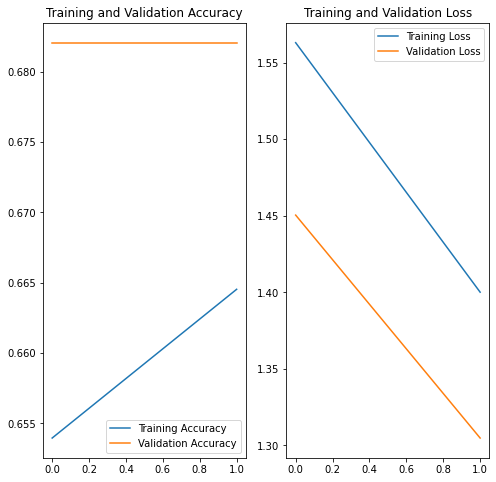

In [82]:
# plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def compute_plot_confusion_matrix(y_true_class, y_pred_class, classes):

    confmat = confusion_matrix(y_true_class, y_pred_class, labels=range(N_CLASSES))
    confmat = confmat / confmat.sum(0).astype(float)
    df_cm = pd.DataFrame(confmat, index = [split_str(c) for c in classes],
                          columns = [split_str(c) for c in classes])

    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize = (12,10))
    sns.heatmap(df_cm, annot=True, fmt=".2f")
    
    return confmat

In [135]:
# get y_test out of tf dataset
y_test_labels = []
#https://stackoverflow.com/questions/56226621/how-to-extract-data-labels-back-from-tensorflow-dataset
for images, labels in X_test.take(1):  # only take first element of dataset
    #numpy_images = images.numpy()
    y_test_labels.append(labels.numpy())

In [138]:
# since my data is batched
y = np.concatenate([y for x, y in X_test], axis=0)

In [139]:
type(y)

numpy.ndarray

In [140]:
y.shape

(4746, 6)

In [141]:
y

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# only works for binary
predictions_raveled = predictions.ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y, predictions_raveled)

In [147]:
classes = len(X_test.class_names)

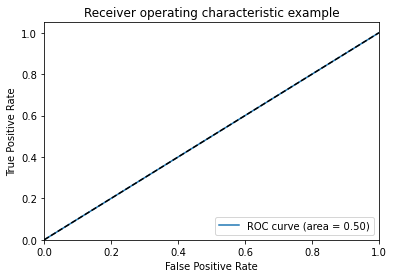

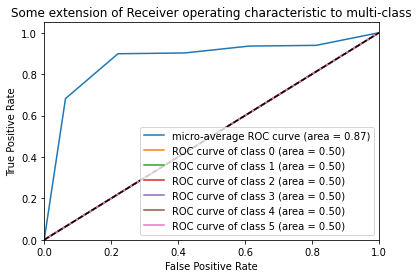

In [157]:
# https://scikit-learn.org/0.15/auto_examples/plot_roc.html#:~:text=ROC%20curves%20are%20typically%20used,necessary%20to%20binarize%20the%20output.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i], predictions[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y.ravel(), predictions.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: Sequential should be a binary classifier

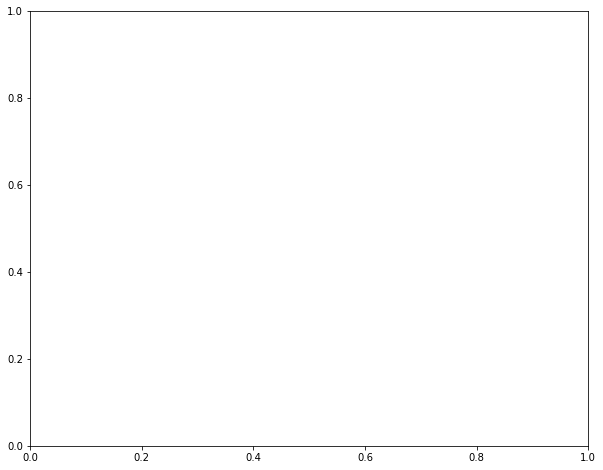

In [122]:
from sklearn import metrics
fig, ax = plt.subplots(1, figsize=(10, 8))
metrics.plot_roc_curve(model, X_test, predictions, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()

In [ ]:
def create_roc_curve(X_train, X_test, y_train, y_test, estimator, ax):
    #fig, ax = plt.subplots()
    for i in estimator:
        clf = i.fit(X_train, y_train)
        metrics.plot_roc_curve(i, X_test, y_test, ax=ax)
    #plt.legend() #or would this be ax.legend?
    #plt.show()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    return ax
    # return roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

In [ ]:
lst = [rf, dt, gdb]
create_roc_curve(X_train, X_test, y_train_ravel, y_test, lst, ax)

In [ ]:
# edit this function for improvements and track model progress
def define_model(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('tanh'))

    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model2 = define_model(nb_filters, kernel_size, input_shape, pool_size)

In [ ]:
# augmentation?
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)